In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from skimage.color import rgb2gray
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train = rgb2gray(X_train)

X_test = rgb2gray(X_test)

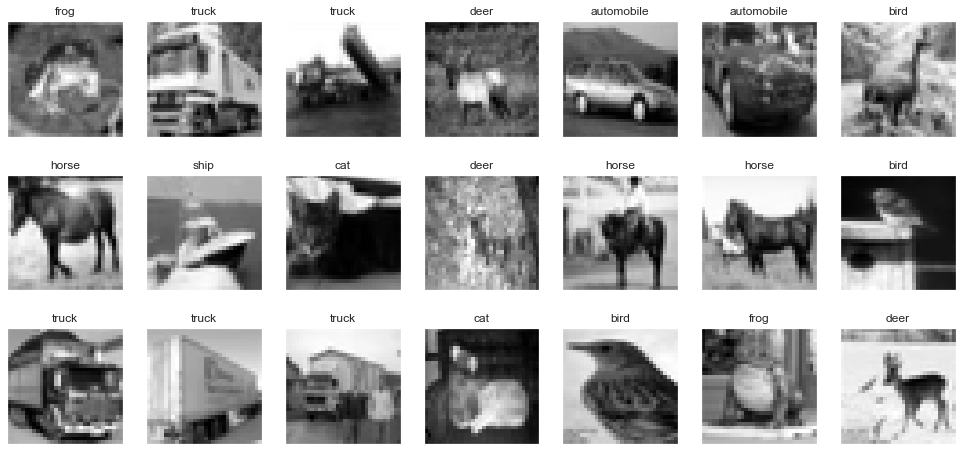

In [5]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [6]:
X_train = X_train.reshape(50000, 32*32)

X_test = X_test.reshape(10000, 32*32)

In [7]:
X_train  = X_train/255
X_test  = X_test/255

# Logistic Regression

In [8]:
# Instantiate Logistic classifier.
classifier = LogisticRegression(fit_intercept=True, solver='lbfgs', multi_class='multinomial', max_iter=10000)
# Train the model.
classifier.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Predict.
y_pred = classifier.predict(X_test)

In [10]:
print("Accuracy of Logistic Regression model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of Logistic Regression model is: 25.77 %


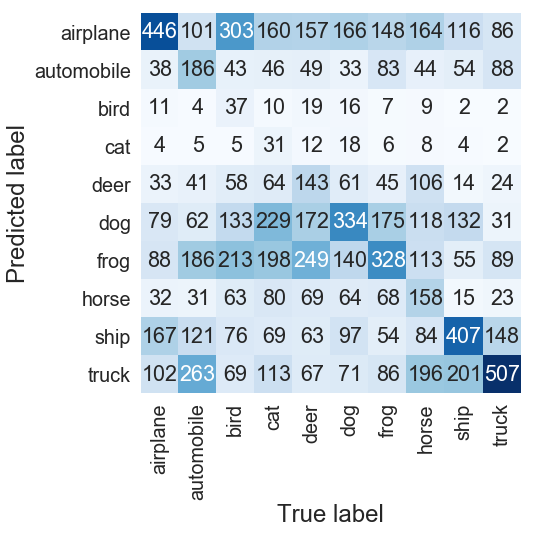

In [11]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

# k-NN

In [12]:
# Create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(10, weights='distance')
# Train the classifier.
clf.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy of k-NN model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of k-NN model is: 30.58 %


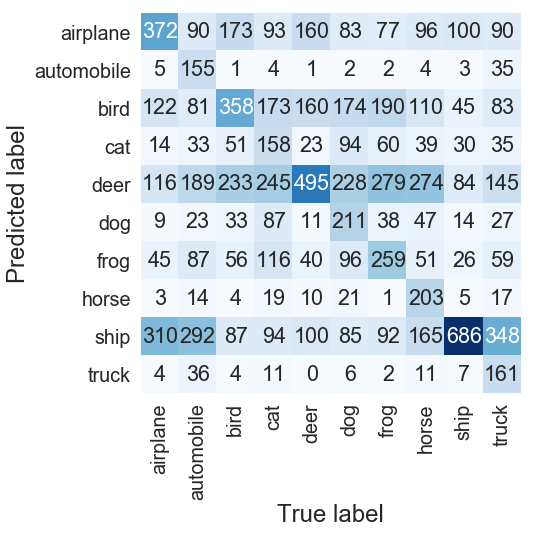

In [15]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

# Decision tree

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier.
clf.fit(X_train, y_train.ravel())

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy of Decision tree model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of Decision tree model is: 22.23 %


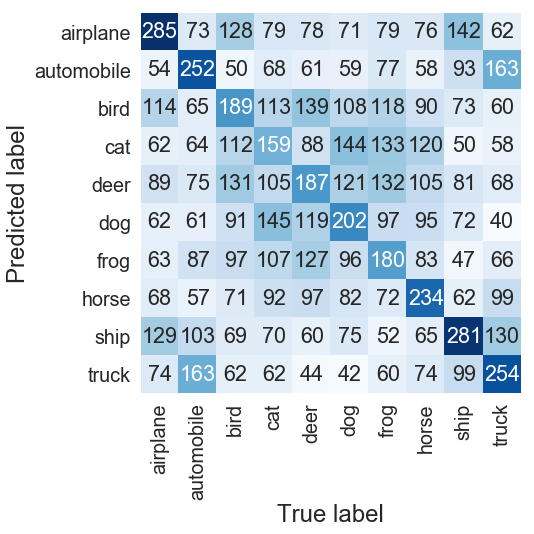

In [19]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

# MLP

In [8]:
clf = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,50,25))

# Train the classifier.
clf.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy of Decision tree model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of Decision tree model is: 40.44 %


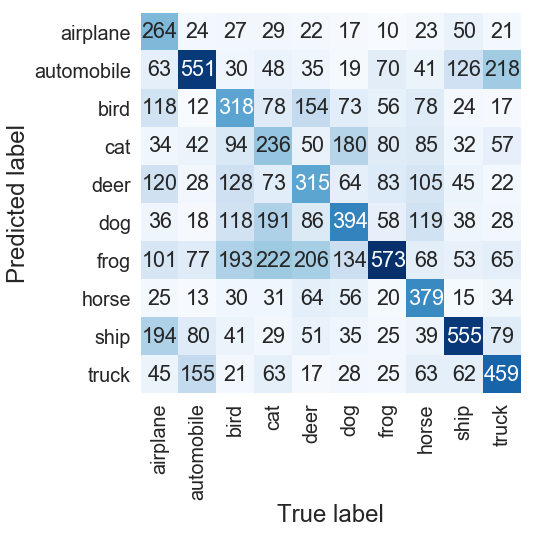

In [11]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

# Referências

[1] https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8